<a href="https://colab.research.google.com/github/Sa234557/Pneumonia-detection-model/blob/main/Pneumonia_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shreenijasahoo","key":"05eba44edb1019ef14691924311f559b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:25<00:00, 104MB/s] 
100% 2.29G/2.29G [00:25<00:00, 96.7MB/s]


In [ ]:
train_dir = '/content/data/chest_xray/train'
test_dir = '/content/data/chest_xray/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // test_generator.batch_size)

Epoch 1/10
163/163 [==============================] - 204s 1s/step - loss: 0.1213 - accuracy: 0.9574 - val_loss: 0.3697 - val_accuracy: 0.8898
Epoch 2/10
163/163 [==============================] - 198s 1s/step - loss: 0.1229 - accuracy: 0.9548 - val_loss: 0.5531 - val_accuracy: 0.8372
Epoch 3/10
163/163 [==============================] - 205s 1s/step - loss: 0.1149 - accuracy: 0.9588 - val_loss: 0.4502 - val_accuracy: 0.8668
Epoch 4/10
163/163 [==============================] - 198s 1s/step - loss: 0.1048 - accuracy: 0.9607 - val_loss: 0.2954 - val_accuracy: 0.9243
Epoch 5/10
163/163 [==============================] - 197s 1s/step - loss: 0.1144 - accuracy: 0.9557 - val_loss: 0.3070 - val_accuracy: 0.9112
Epoch 6/10
163/163 [==============================] - 194s 1s/step - loss: 0.1167 - accuracy: 0.9590 - val_loss: 0.2952 - val_accuracy: 0.9128
Epoch 7/10
163/163 [==============================] - 197s 1s/step - loss: 0.1098 - accuracy: 0.9597 - val_loss: 0.2938 - val_accuracy: 0.9227

In [ ]:
loss, accuracy = model.evaluate(test_generator, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Test Loss: 0.3116
Test Accuracy: 0.9231


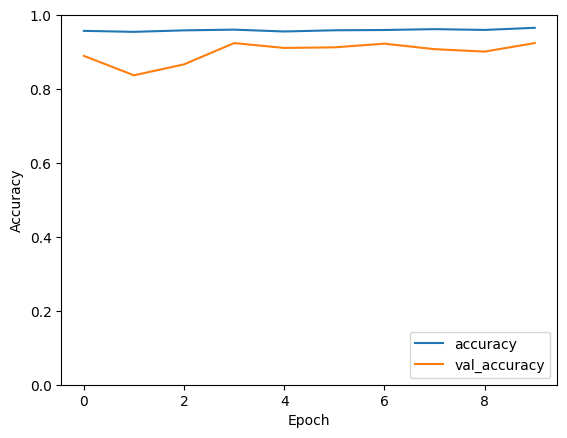

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
predictions = model.predict(test_generator)
y_pred = np.where(predictions > 0.5, 1, 0)


20/20 [==============================] - 7s 339ms/step


In [ ]:
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.32      0.36       234
           1       0.63      0.70      0.67       390

    accuracy                           0.56       624
   macro avg       0.52      0.51      0.51       624
weighted avg       0.54      0.56      0.55       624



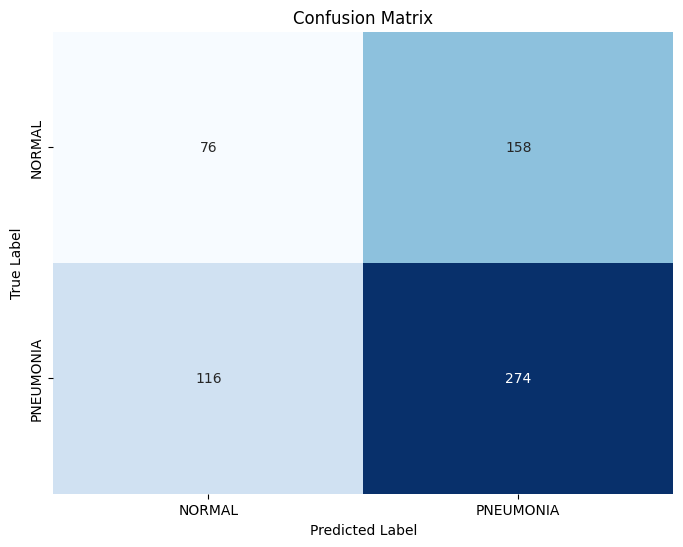

In [ ]:
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()